# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [42]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x, deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define y for output dataset            
y = np.array([[0,0,1,1]]).T

In [43]:

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1
# define syn1

iter = 0
#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）

error_history = []

神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [44]:
for iter in range(1000):
    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0, syn0))

    '''
    新增
    l2_error 該值說明了神經網路預測時“丟失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    '''
 
    # how much did we miss?
    l1_error = y - l1
    error_history.append(l1_error.mean())
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1, True) * 0.3
    
    print("Itr # %3d:" % (iter))
    print("\t l1_error", l1_error.flatten())
    print("\t l1_delta", l1_delta.flatten())
    print("\t syn0", syn0.flatten())

    # update weights
    syn0 += np.dot(l0.T, l1_delta)
    # syn1 update weights
    print("\t syn0", syn0.flatten())

print("Output After Training:")
print(l1)
print("\n\n")
print(l1)

-2.68748047]
Itr # 911:
	 l1_error [-0.06371616 -0.05185686  0.04200114  0.05172947]
	 l1_delta [-0.00114032 -0.00076491  0.000507    0.00076125]
	 syn0 [ 5.81463041 -0.21853769 -2.68748047]
	 syn0 [ 5.81589866 -0.21854134 -2.68811745]
Itr # 912:
	 l1_error [-0.06367817 -0.05182538  0.04197574  0.05169869]
	 l1_delta [-0.00113901 -0.000764    0.0005064   0.00076037]
	 syn0 [ 5.81589866 -0.21854134 -2.68811745]
	 syn0 [ 5.81716544 -0.21854497 -2.68875369]
Itr # 913:
	 l1_error [-0.06364025 -0.05179394  0.04195039  0.05166796]
	 l1_delta [-0.0011377  -0.0007631   0.0005058   0.00075949]
	 syn0 [ 5.81716544 -0.21854497 -2.68875369]
	 syn0 [ 5.81843073 -0.21854858 -2.68938919]
Itr # 914:
	 l1_error [-0.06360239 -0.05176256  0.04192509  0.05163729]
	 l1_delta [-0.00113639 -0.0007622   0.00050521  0.00075862]
	 syn0 [ 5.81843073 -0.21854858 -2.68938919]
	 syn0 [ 5.81969456 -0.21855216 -2.69002396]
Itr # 915:
	 l1_error [-0.06356459 -0.05173124  0.04189983  0.05160667]
	 l1_delta [-0.00113509

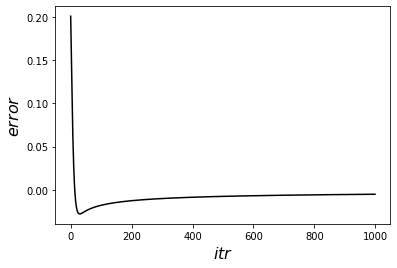

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(error_history, ms=3, lw=1.5, color='black')
plt.xlabel(r'$itr$', fontsize=16)
plt.ylabel(r'$error$', fontsize=16)
plt.show()